# Decision Tree On Titanic Dataset

Decision Tree:

Using the Titanic Survival Dataset (from Kaggle), build a Decision Tree

Classifier to predict whether a passenger survived based on their demographic and travel details.

Instructions:

1) Load the dataset and explore the features (Passenger Class, Age, Sex, Fare,Embarked, SibSp, Parch, etc.).

2) Preprocess the data: Handle missing values, encode categorical variables,and split the dataset into training and test sets.

3) Train a Decision Tree model to classify whether a passenger survived(Survived: 0 or 1).

4) Visualize the Decision Tree and analyze which features played the mostcrucial role in survival.

5) Evaluate model performance using accuracy, confusion matrix, precision,recall, and F1-score.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [77]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploraratory Data Analysis(EDA)

In [78]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Preprocess the data: Handle missing values, encode categorical variables,and split the dataset into training and test sets.

In [82]:
# Fill missing 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [83]:
# Drop rows with missing 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

# Optionally, fill missing 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

In [84]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**2. Encode Categorical Variables**

In [85]:
# Encode 'Sex' column with label encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [86]:
# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [87]:
# One-hot encode 'Cabin' column 
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])  # Keep only the first letter of Cabin
df = pd.get_dummies(df, columns=['Cabin'], drop_first=True)

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,False,True,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,False,True,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True,False,False,False,False,False,False,False,True


# Train a Decision Tree model to classify whether a passenger survived(Survived: 0 or 1).

In [89]:
from sklearn.model_selection import train_test_split

# Define feature columns and target variable
X = df.drop(columns=['Survived', 'Name', 'Ticket'])  
y = df['Survived']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)


# Visualize the Decision Tree and analyze which features played the mostcrucial role in survival.

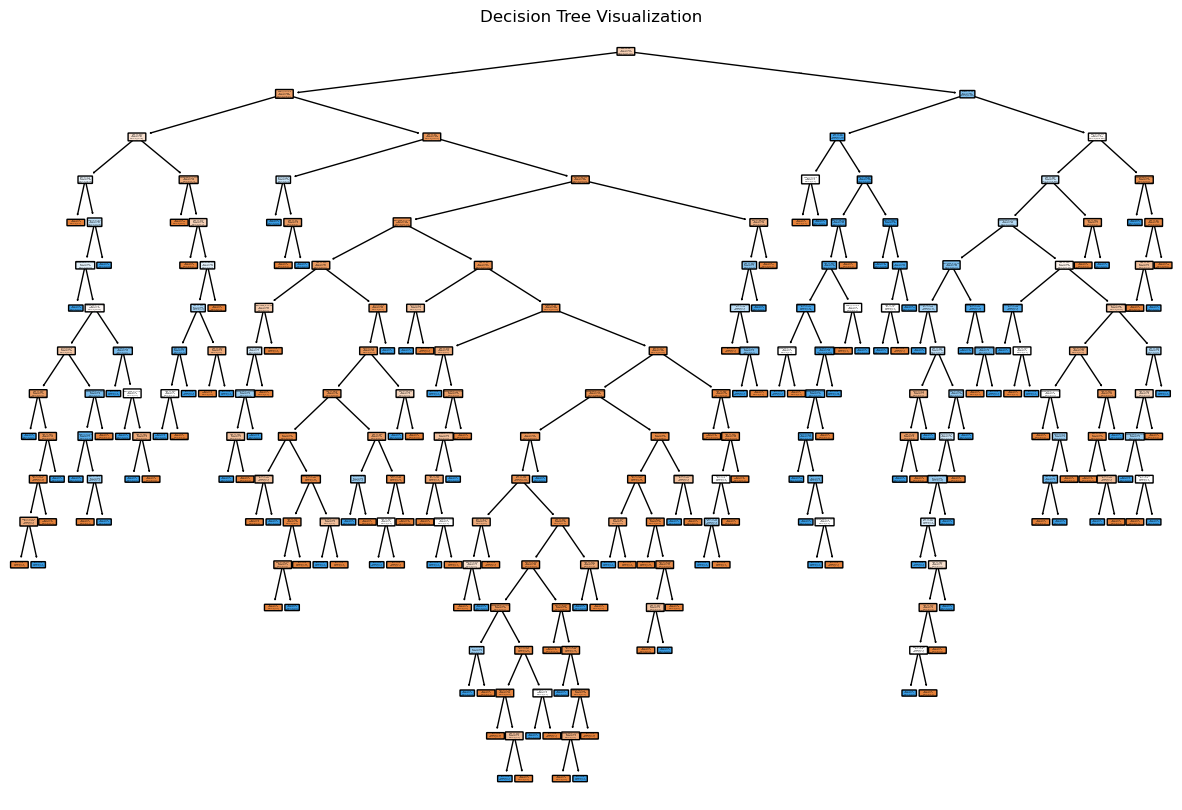

In [91]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# Evaluate model performance using accuracy, confusion matrix, precision,recall, and F1-score.

In [92]:
y_pred = dt_model.predict(X_test)
print(y_pred)

[0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1]


**Accuracy**

In [93]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7640


**Precision ,Recall ,F1 score**

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [95]:
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.6892
Recall: 0.7286
F1-Score: 0.7083


**Classification Report**

In [96]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       108
           1       0.69      0.73      0.71        70

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.77       178



**confusion Matrix**

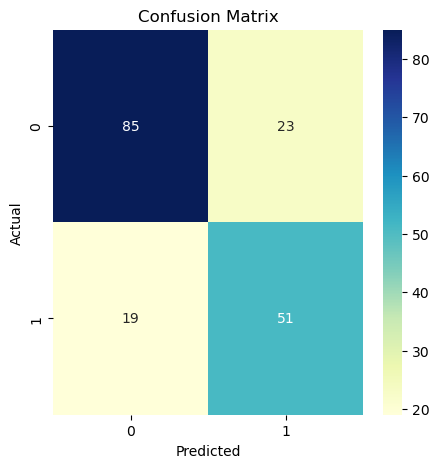

In [97]:
#confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()